# Survey analysis

In [106]:
#!pip install openpyxl
import pandas as pd
import matplotlib.pyplot as plt

## Load and clean data

In [107]:
df = pd.read_csv("../data/results-survey323625.csv")
#t = pd.DataFrame(pd.Series(list(df.columns)))
#t["reco"] = None
#t.to_csv("reco_columns.csv", index=False)
reco_col = pd.read_csv("./reco_columns.csv") 
reco_col = dict(reco_col.set_index("0").dropna()["reco"])
print(df.shape)
df.columns = [(lambda i: reco_col[i] if i in reco_col else i)(i) for i in df.columns]
df.head(2)

(52, 177)


,Response ID,Date submitted,Last page,Start language,Seed,Date started,Date last action,place,status,status_other,...,Question time: G03Q44,Question time: G03Q35,Group time: Opening questions,Question time: G04Q36,Question time: G04Q37,Question time: G04Q38,Question time: G04Q42,Question time: G04Q43,Question time: G04Q44,Question time: G04Q45
0,1,NaN,1.0,en,1620213016,2024-07-09 07:38:32,2024-07-09 07:39:05,ENSAE,Faculty,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2024-07-09 07:43:28,4.0,en,4156259,2024-07-09 07:38:53,2024-07-09 07:43:28,ENSAE,Faculty,NaN,...,NaN,NaN,42.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analyse

<Axes: >

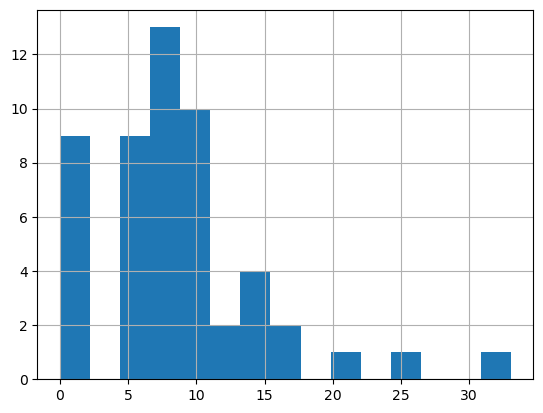

In [111]:
(df["time"]/60).hist(bins=15)

<Axes: xlabel='time_at_crest'>

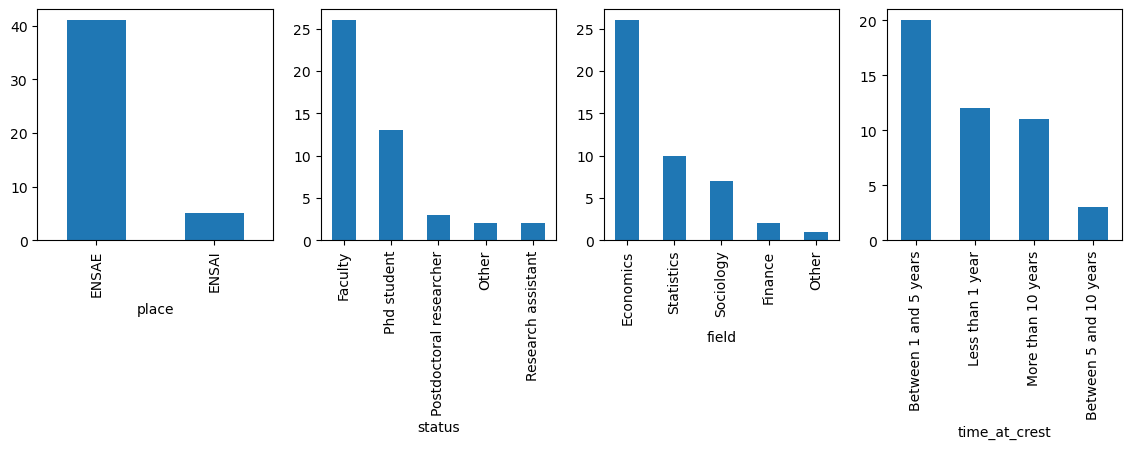

In [104]:
fix, ax = plt.subplots(1,4, figsize=(14,3))
df["place"].value_counts().plot(kind="bar", ax=ax[0])
df["status"].value_counts().plot(kind="bar", ax=ax[1])
df["field"].value_counts().plot(kind="bar", ax=ax[2])
df["time_at_crest"].value_counts().plot(kind="bar", ax=ax[3])



<Axes: xlabel='0'>

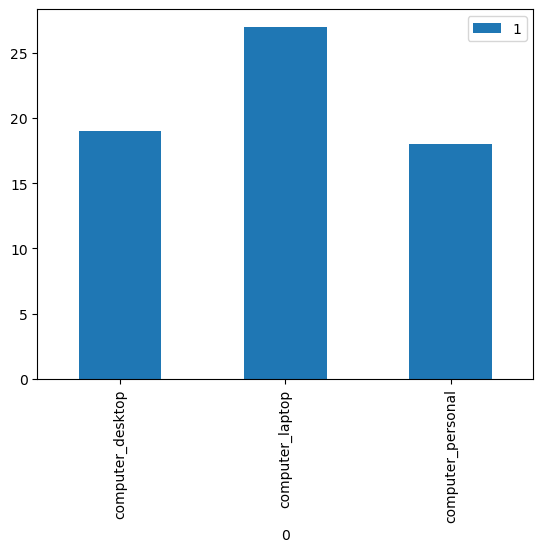

In [98]:
pd.DataFrame([[i, (df[i]=="Yes").sum()] for i in df.columns if "computer_" in i]).set_index(0).plot(kind="bar")

<Axes: xlabel='0'>

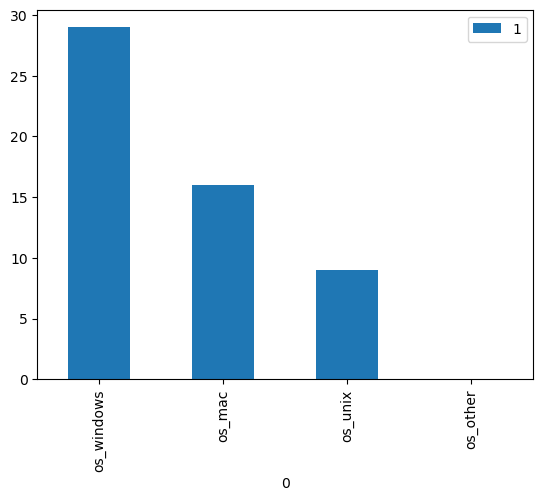

In [99]:
pd.DataFrame([[i, (df[i]=="Yes").sum()] for i in df.columns if "os_" in i]).set_index(0).plot(kind="bar")

In [100]:
df["dedicated_desktop"].value_counts()

dedicated_desktop
Yes    26
No     20
Name: count, dtype: int64

In [101]:
df["essential_software"]

0                                                   NaN
1                  R, STATA, Python, Winedt, Office 365
2     Matlab, Stata, Mathematica, Arcgis, and Spss.\...
3                   TekMaker\nR\nMatlab\nPython\nGurobi
4                                                   NaN
5              Python, Stata, r, matlab, windows office
6                                                Python
7                                                   NaN
8                                                   NaN
9     StatTransfer, Stata, R, Windows Package (Word,...
10    Microsoft Office, Overleaf, Dropbox, R, Python...
11     mainly R, sometimes Python, SAS, Stata and Excel
12    LaTeX, python, VSCode, Zotero.\nMS Word, MS Ou...
13                                                  NaN
14    Rstudio, python, putty, winscp, mailbox, overl...
15    -Stata\n-Python\n-JupyterLab\n-Julia\n-Matlab\...
16                                                  NaN
17       Stata\nMatlab\nR\nJulia\nMikTex/Latex\n

In [105]:
df["onyxia"].value_counts()

onyxia
Yes, I heard about it but never used    15
No, not at all                          11
Yes, and I tried it at least once        9
Yes, and I use it for my research        7
Name: count, dtype: int64

In [113]:
for i in list(df["general_comments"].dropna()):
    print("\n\n"+i)



Could CREST offer VPN service?

There is a VPN service from X, but many databases we have access to are based under the name of ENSAE...


I'm not sure what are ABRA servers, if you mean the clusters (tortank...etc) then I use them yes. They are very convenient and easy to use I think keeping them updated and improving them would be useful (adding a local storage option to replace CASD as mentioned would be nice). Now, I have the impression that not all of them are fully updated with all softwares, a few colleagues have been directed toward the cluster number 6 because Python is not updated on the other clusters. This is problematic because then everybody starts to use the same server and it becomes slow. Maintaining up to date all the HPC is important.


It's Emilien


Stop providing laptops which are remotely controlled by DSI!
This is the rule imposed at Ensai.
It's a huge waste of time for the researchers, counter-productive. 
Explain again and again to Ensai DSI that researchers